#### MNIST digit classification by using Deep Learnig Methods.
     Python Libraries used: Scikit Learn, Tensorflow, Pandas, Numpy, Matplotlib

#### Steps:
     1. Import Libraries 
     2. Exploratory Data Analysis 
     3. Feature Engineering (Data Normalization)
     4. Model Training
       4.1 Artificial Neural Network 
       4.2 Convolutional Neural Network
     5. Model Evaluation : F-1 Score,Recall, Precision and Recall

### 1. Importing all the required libraries

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

### 2. Exploratory Data Analysis:

In [2]:
data=pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Function for reshaping 784 pixels into 28x28 matrix
def pixel_mat(array):
    pixel_mat=array.reshape(28,28)
    return pixel_mat

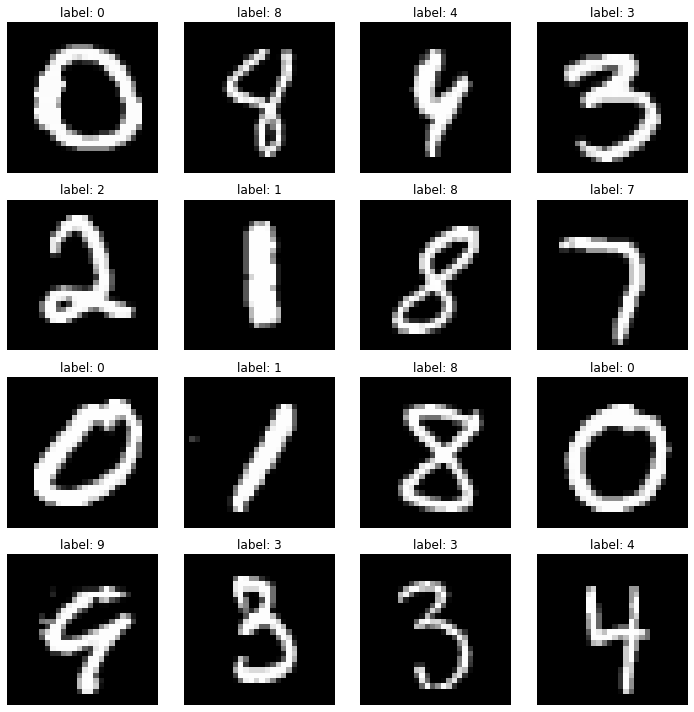

In [4]:
# To plot randomly 16 images
# to generate a list of 16 rows
axs_idx=np.random.choice(data.index,size=16,replace=False)

# to plot 4x4 images
fig,axs=plt.subplots(nrows=4, ncols=4,figsize=(10,10))

i=0;
# Reshape 4x4 matrix into vector inorder to make it iterable
for ax in axs.reshape(-1):
    img=pixel_mat(data.drop('label',axis=1).iloc[axs_idx[i]].values)
    ax.set_title('label: %d'%data['label'].iloc[axs_idx[i]])
    #imshow is flag that is used in matshow wrapper
    ax.imshow(img,cmap=plt.cm.gray, origin='upper',interpolation=
              'nearest')
    ax.axis('off')
    i+=1;
# tight layout gives more spacing between subplots
plt.tight_layout()
# To plot all the previously generated object
plt.show()

In [5]:
# Total number of data
total_data=len(data)
print('Total Number of data available:',total_data)

Total Number of data available: 42000


In [6]:
# Number of unique class
unique_class=data['label'].nunique()
print('Total unique Label:',unique_class)

Total unique Label: 10


In [7]:
#Check the different output classes available
data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [8]:
# To find the frequency of each label
data['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [9]:
# Frequency distribution for each unique label
data['label'].value_counts(normalize=True).sort_index()

0    0.098381
1    0.111524
2    0.099452
3    0.103595
4    0.096952
5    0.090357
6    0.098500
7    0.104786
8    0.096738
9    0.099714
Name: label, dtype: float64

Comment: As total 10 different labels is available and all the labels falling in between 9%-11%. From this data it can be infer that data is balanced.

In [10]:
# To evaluate the mean and standard deviation of labels.
mean=data['label'].value_counts(normalize=True).sort_index().mean()
std_dev=data['label'].value_counts(normalize=True).sort_index().std()
print('Mean: %0.2f and Std Deviation: %0.4f'%(mean,std_dev))

Mean: 0.10 and Std Deviation: 0.0056


In [11]:
#To find the general distribution for each pixels by using stack method
stacked_data=data.drop('label',axis=1).stack()
stacked_data

0      pixel0      0
       pixel1      0
       pixel2      0
       pixel3      0
       pixel4      0
                  ..
41999  pixel779    0
       pixel780    0
       pixel781    0
       pixel782    0
       pixel783    0
Length: 32928000, dtype: int64

In [12]:
# To find the normalize frequency of each different pixel values
pd.value_counts(stacked_data,normalize=True).sort_index()

0      0.808470
1      0.000491
2      0.000717
3      0.000765
4      0.000812
         ...   
251    0.002378
252    0.014151
253    0.032387
254    0.017009
255    0.006782
Length: 256, dtype: float64

Comment: 80% of pixels contains 0 values. and rest 20% of pixels contain values from 1 to 255.

In [13]:
# Identify the pixel values proportion in different range of values
intensity_cut=pd.cut(stacked_data,4)
pd.value_counts(intensity_cut,normalize=True).sort_index()

(-0.255, 63.75]    0.843233
(63.75, 127.5]     0.024144
(127.5, 191.25]    0.026349
(191.25, 255.0]    0.106275
dtype: float64

#### 3. Feature Engineering

In [14]:
# Data Normalization
#Convert all the pixels in between 0 to 1 by dividing by 255
def feature_norm(numpy_array):
    numpy_array=numpy_array/255
    return numpy_array

#### 4. Models Training 

In [15]:
# Here X is feature data and y is label
X=data.drop('label',axis=1)
y=data['label']

In [16]:
# Split the data into training and testing set and maintaining the equal distribution of each label in each fold.
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.15, random_state=16)
split_idx=sss.split(X,y)

In [17]:
#Accessing all the index of training and testing of the data
train_idx,test_idx=list(split_idx)[0]

In [18]:
# Converting Input and Output features into numpy arrays
X_train=np.array(X.iloc[train_idx])
y_train=np.array(y.iloc[train_idx])
X_test=np.array(X.iloc[test_idx])
y_test=np.array(y.iloc[test_idx])

In [19]:
# Reshaping the X_training and X_test into 28x28
d1,d2=X_train.shape  # d1 is number of instances in training set
d3,d4=X_test.shape   # d3 is number of instances in test set
X_train=X_train.reshape(d1,28,28)
X_test=X_test.reshape(d3,28,28)

In [20]:
#Normalizing the features
X_train=feature_norm(X_train)
X_test=feature_norm(X_test)

### 4.1 Artificial Neural Network with 1 Hidden Layer 
        - Number of parameter to be trained: 784x1000+1000x10 =794000=0.79 Million
        - Activation function for hidden layer is 'Relu'
        - For Activation function for output layer is 'sigmoid'
        - Optimizer is 'adam' 

In [21]:
# Artificial Neural Network with 1 Hidden Layer 
ANN_1=models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ANN_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ANN_1.fit(X_train,y_train,epochs=10)

Epoch 1/10
1116/1116 [==============================] - 36s 30ms/step - loss: 0.2246 - accuracy: 0.9339
Epoch 2/10
1116/1116 [==============================] - 38s 34ms/step - loss: 0.0875 - accuracy: 0.9733
Epoch 3/10
1116/1116 [==============================] - 35s 32ms/step - loss: 0.0573 - accuracy: 0.9830
Epoch 4/10
1116/1116 [==============================] - 35s 31ms/step - loss: 0.0362 - accuracy: 0.9885
Epoch 5/10
1116/1116 [==============================] - 34s 31ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 6/10
1116/1116 [==============================] - 46s 41ms/step - loss: 0.0210 - accuracy: 0.9924
Epoch 7/10
1116/1116 [==============================] - 46s 42ms/step - loss: 0.0156 - accuracy: 0.9950
Epoch 8/10
1116/1116 [==============================] - 37s 33ms/step - loss: 0.0151 - accuracy: 0.9946
Epoch 9/10
1116/1116 [==============================] - 35s 32ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 10/10
1116/1116 [==============================] - 34s 30m

In [24]:
#Generating classification report
y_pred_1=ANN_1.predict(X_test)
y_pred_1=np.argmax(y_pred_1,1)
print('Classification Report:\n',classification_report(y_test,y_pred_1))

197/197 [==============================] - 2s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       620
           1       0.98      0.99      0.99       703
           2       0.98      0.97      0.97       626
           3       0.96      0.98      0.97       653
           4       0.98      0.97      0.97       611
           5       0.96      0.98      0.97       569
           6       0.99      0.99      0.99       621
           7       0.96      0.98      0.97       660
           8       0.97      0.97      0.97       609
           9       0.97      0.93      0.95       628

    accuracy                           0.97      6300
   macro avg       0.97      0.97      0.97      6300
weighted avg       0.97      0.97      0.97      6300



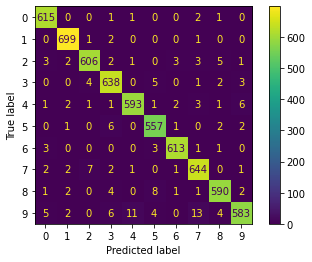

In [25]:
# Confusion Matrix visualization
cm = confusion_matrix(y_test,y_pred_1, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

Comment: 

         1. Recall of digit 9 is lowest. Because in some cases 9 is predicted as 0,1,3,4,5,7,8. 
         2. Digit 0,1 and 6 have highest F-1 Score.

### 4.2 Artificial Neural Network with 2 Hideen Layer
     - Number of parameter to be trained:(784x1000+1000)+(1000x500+500)+(500x10+10)=1.2 Million
     - Activation function for hidden layer is 'Relu'
     - Activation function for output layer is 'sigmoid'
     - Optimizer is 'adam' 

In [26]:
# Artificial Neural Network with 2 Hidden Layer 
ANN_2=models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(500,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ANN_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ANN_2.fit(X_train,y_train,epochs=10)


Epoch 1/10
1116/1116 [==============================] - 61s 54ms/step - loss: 0.2142 - accuracy: 0.9334
Epoch 2/10
1116/1116 [==============================] - 57s 51ms/step - loss: 0.0910 - accuracy: 0.9715
Epoch 3/10
1116/1116 [==============================] - 56s 50ms/step - loss: 0.0607 - accuracy: 0.9804
Epoch 4/10
1116/1116 [==============================] - 61s 55ms/step - loss: 0.0460 - accuracy: 0.9852
Epoch 5/10
1116/1116 [==============================] - 53s 47ms/step - loss: 0.0354 - accuracy: 0.9878
Epoch 6/10
1116/1116 [==============================] - 59s 53ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 7/10
1116/1116 [==============================] - 56s 50ms/step - loss: 0.0294 - accuracy: 0.9910
Epoch 8/10
1116/1116 [==============================] - 68s 61ms/step - loss: 0.0234 - accuracy: 0.9932
Epoch 9/10
1116/1116 [==============================] - 59s 53ms/step - loss: 0.0198 - accuracy: 0.9941
Epoch 10/10
1116/1116 [==============================] - 59s 52m

In [29]:
#Generating classification report
y_pred_2=ANN_2.predict(X_test)
y_pred_2=np.argmax(y_pred_2,1)
print('Classification Report:\n',classification_report(y_test,y_pred_2))

197/197 [==============================] - 2s 10ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       620
           1       0.99      0.98      0.99       703
           2       0.97      0.98      0.98       626
           3       0.94      0.98      0.96       653
           4       0.98      0.97      0.97       611
           5       0.95      0.98      0.96       569
           6       0.98      1.00      0.99       621
           7       0.96      0.97      0.97       660
           8       0.99      0.93      0.96       609
           9       0.96      0.93      0.95       628

    accuracy                           0.97      6300
   macro avg       0.97      0.97      0.97      6300
weighted avg       0.97      0.97      0.97      6300



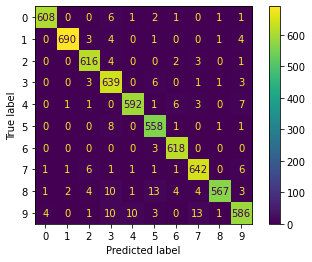

In [30]:
# Confusion Matrix visualization
cm = confusion_matrix(y_test,y_pred_2, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

# 4.3 Artificial Neural Network with 2 Hideen Layer
     - Number of parameters:(784x1000+1000)+(1000x500+500)+(500x250+250)+(250x10+10)=1.4 Million
     - Activation function for hidden layer is 'Relu'
     - Activation function for output layer is 'sigmoid'
     - Optimizer is 'adam' 

In [31]:
# Artificial Neural Network with 3 Hidden Layer 
ANN_3=models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(500,activation='relu'),
    layers.Dense(250,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ANN_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ANN_3.fit(X_train,y_train,epochs=10)

Epoch 1/10
1116/1116 [==============================] - 66s 58ms/step - loss: 0.2292 - accuracy: 0.9302
Epoch 2/10
1116/1116 [==============================] - 70s 63ms/step - loss: 0.1031 - accuracy: 0.9689
Epoch 3/10
1116/1116 [==============================] - 76s 68ms/step - loss: 0.0730 - accuracy: 0.9762
Epoch 4/10
1116/1116 [==============================] - 78s 70ms/step - loss: 0.0566 - accuracy: 0.9824
Epoch 5/10
1116/1116 [==============================] - 75s 67ms/step - loss: 0.0446 - accuracy: 0.9860
Epoch 6/10
1116/1116 [==============================] - 60s 54ms/step - loss: 0.0383 - accuracy: 0.9883
Epoch 7/10
1116/1116 [==============================] - 62s 55ms/step - loss: 0.0334 - accuracy: 0.9893
Epoch 8/10
1116/1116 [==============================] - 63s 56ms/step - loss: 0.0281 - accuracy: 0.9916
Epoch 9/10
1116/1116 [==============================] - 64s 57ms/step - loss: 0.0240 - accuracy: 0.9929
Epoch 10/10
1116/1116 [==============================] - 69s 62m

In [32]:
#Generating classification report
y_pred_3=ANN_3.predict(X_test)
y_pred_3=np.argmax(y_pred_3,1)
print('Classification Report:\n',classification_report(y_test,y_pred_3))

197/197 [==============================] - 3s 12ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       620
           1       0.98      1.00      0.99       703
           2       1.00      0.95      0.97       626
           3       0.97      0.98      0.98       653
           4       0.97      0.97      0.97       611
           5       0.99      0.97      0.98       569
           6       0.99      0.98      0.98       621
           7       0.97      0.98      0.98       660
           8       0.94      0.98      0.96       609
           9       0.97      0.94      0.95       628

    accuracy                           0.97      6300
   macro avg       0.97      0.97      0.97      6300
weighted avg       0.97      0.97      0.97      6300



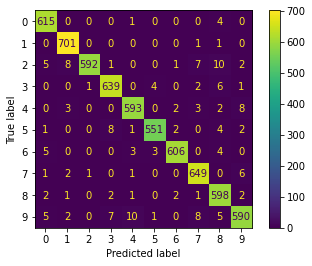

In [33]:
# Confusion Matrix visualization
cm = confusion_matrix(y_test,y_pred_3, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

# 4.4 CNN with 1 Conv Filter and 1 Max pooling layer
     - 3x3 Convolutional Filter (32 Filters) and Max pooling (2x2,stride=1)
     - 2 Nos Fully connected layers
     - Number of parameters to be trained: 0.3 Million
     - Activation function for hidden layer is 'Relu'
     - Activation function for output layer is 'softmax'
     - Optimizer is 'adam' 

In [34]:
# Convolutional Neural Network with 1 Convolutional filter and 1 max pooling layer with 2 dense layer
CNN_1=models.Sequential([
    #Layer 1
    layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    #Dense Layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')  
])
CNN_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
CNN_1.fit(X_train,y_train,epochs=10)

Epoch 1/10
1116/1116 [==============================] - 19s 15ms/step - loss: 0.2913 - accuracy: 0.9144
Epoch 2/10
1116/1116 [==============================] - 16s 15ms/step - loss: 0.1015 - accuracy: 0.9694
Epoch 3/10
1116/1116 [==============================] - 16s 14ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 4/10
1116/1116 [==============================] - 16s 14ms/step - loss: 0.0484 - accuracy: 0.9855
Epoch 5/10
1116/1116 [==============================] - 16s 15ms/step - loss: 0.0361 - accuracy: 0.9887
Epoch 6/10
1116/1116 [==============================] - 16s 15ms/step - loss: 0.0309 - accuracy: 0.9899
Epoch 7/10
1116/1116 [==============================] - 16s 14ms/step - loss: 0.0217 - accuracy: 0.9939
Epoch 8/10
1116/1116 [==============================] - 19s 17ms/step - loss: 0.0189 - accuracy: 0.9946
Epoch 9/10
1116/1116 [==============================] - 16s 14ms/step - loss: 0.0140 - accuracy: 0.9960
Epoch 10/10
1116/1116 [==============================] - 16s 15m

In [35]:
#Generating classification report
y_pred_4=CNN_1.predict(X_test)
y_pred_4=np.argmax(y_pred_4,1)
print('Classification Report:\n',classification_report(y_test,y_pred_4))

197/197 [==============================] - 2s 7ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       620
           1       0.99      1.00      0.99       703
           2       0.96      0.99      0.97       626
           3       0.99      0.96      0.97       653
           4       0.99      0.93      0.96       611
           5       0.98      0.97      0.97       569
           6       0.97      1.00      0.99       621
           7       0.98      0.97      0.97       660
           8       0.99      0.97      0.98       609
           9       0.92      0.97      0.94       628

    accuracy                           0.97      6300
   macro avg       0.97      0.97      0.97      6300
weighted avg       0.98      0.97      0.97      6300



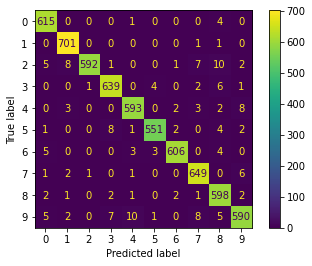

In [36]:
# Confusion Matrix visualization
cm = confusion_matrix(y_test,y_pred_3, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

# 4.5 CNN with 2 Conv Filter and 2 Max pooling layer
     - 3x3 Convolutional Filter (32 Filters) and Max pooling (2x2,stride=1)
     - 2 Nos Fully connected layers
     - Number of parameters to be trained: 0.4 Million
     - Activation function for hidden layer is 'Relu'
     - Activation function for output layer is 'softmax'
     - Optimizer is 'adam' 

In [40]:
# Convolutional Neural Network with 2 Convolutional filter and 2 max pooling layer with 2 dense layer
CNN_2=models.Sequential([
    #Layer 1
    layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    #Layer 2
    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #Dense Layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')  
])

CNN_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
CNN_2.fit(X_train,y_train,epochs=15)

Epoch 1/15
1116/1116 [==============================] - 27s 21ms/step - loss: 0.2613 - accuracy: 0.9230
Epoch 2/15
1116/1116 [==============================] - 22s 20ms/step - loss: 0.0830 - accuracy: 0.9743
Epoch 3/15
1116/1116 [==============================] - 22s 20ms/step - loss: 0.0608 - accuracy: 0.9804
Epoch 4/15
1116/1116 [==============================] - 25s 22ms/step - loss: 0.0474 - accuracy: 0.9857
Epoch 5/15
1116/1116 [==============================] - 23s 20ms/step - loss: 0.0372 - accuracy: 0.9878
Epoch 6/15
1116/1116 [==============================] - 23s 21ms/step - loss: 0.0313 - accuracy: 0.9899
Epoch 7/15
1116/1116 [==============================] - 23s 21ms/step - loss: 0.0265 - accuracy: 0.9911
Epoch 8/15
1116/1116 [==============================] - 23s 21ms/step - loss: 0.0221 - accuracy: 0.9923
Epoch 9/15
1116/1116 [==============================] - 23s 21ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 10/15
1116/1116 [==============================] - 23s 21m

In [41]:
#Generating classification report
y_pred_5=CNN_2.predict(X_test)
y_pred_5=np.argmax(y_pred_5,1)
print('Classification Report:\n',classification_report(y_test,y_pred_5))

197/197 [==============================] - 2s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       620
           1       0.98      1.00      0.99       703
           2       0.98      0.98      0.98       626
           3       0.99      0.99      0.99       653
           4       0.98      0.99      0.98       611
           5       0.98      0.99      0.98       569
           6       0.97      1.00      0.98       621
           7       0.98      0.97      0.98       660
           8       0.98      0.97      0.98       609
           9       0.99      0.95      0.97       628

    accuracy                           0.98      6300
   macro avg       0.98      0.98      0.98      6300
weighted avg       0.98      0.98      0.98      6300



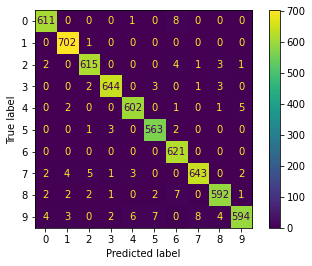

In [42]:
# Confusion Matrix visualization
cm = confusion_matrix(y_test,y_pred_5, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

In [46]:
# Exporting all the models.
ANN_1.save('models\ANN_1.h5')
ANN_2.save('models\ANN_2.h5')
ANN_3.save('models\ANN_3.h5')
CNN_1.save('models\CNN_1.h5')
ANN_2.save('models\CNN_2.h5')


### Conclusion:
     1. Convolutional Neural Network is giving comparatively good result.
     2. Convolutional Neural Network takes less parameter than the Artificial Neural Network.
     3. Highest accuracy on test set is 98% for CNN_2 Model. 97% for rest of the models.
                 
    